In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import joblib

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
# ELIMINO SPAZI NEI NOMI DELLE FEATURE
df.columns = df.columns.str.strip()

In [4]:
df.shape

(145460, 23)

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [8]:
df.describe(include='object')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


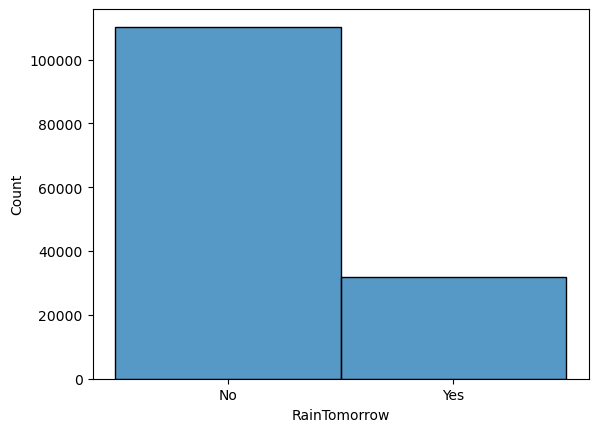

In [9]:
sns.histplot(data=df, x='RainTomorrow')
plt.show()

In [10]:
# Converto la variabile Target 'RainTomorrow' in 0 e 1 (No=0, Yes=1)
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [11]:
dirty_values = [' ', '', '?', '-', 'na', 'n/a', 'null', 'None']

print("--- Analisi Valori Sporchi (Dirty Data) ---")

# Scansiono ogni colonna
found_issues = False
for col in df.columns:
    # Controll0 solo le colonne di tipo stringa (Object)
    if df[col].dtype == 'object':
        # Conto quanti valori nella colonna corrispondono a uno dei dirty_values
        # (strip() rimuove spazi iniziali/finali per trovare anche "  " come vuoto)
        count = df[col].apply(lambda x: str(x).strip() in dirty_values).sum()

        if count > 0:
            found_issues = True
            print(f"[!] Colonna '{col}': trovati {count} valori sporchi.")
            # Mostra quali valori sporchi ci sono
            unique_dirty = df[df[col].isin(dirty_values)][col].unique()
            print(f"    -> Valori rilevati: {unique_dirty}")

if not found_issues:
    print("Nessun valore sporco trovato.")

--- Analisi Valori Sporchi (Dirty Data) ---
Nessun valore sporco trovato.


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

GRAFICI

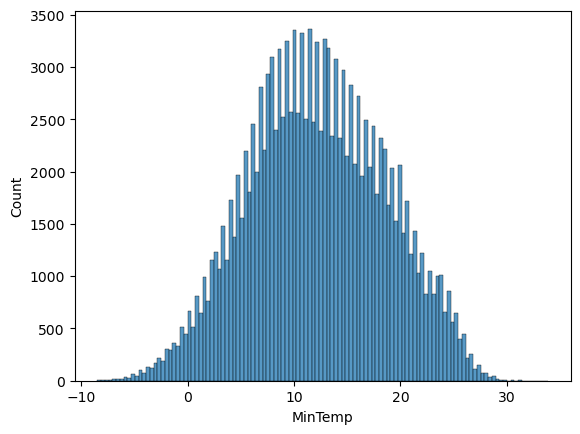

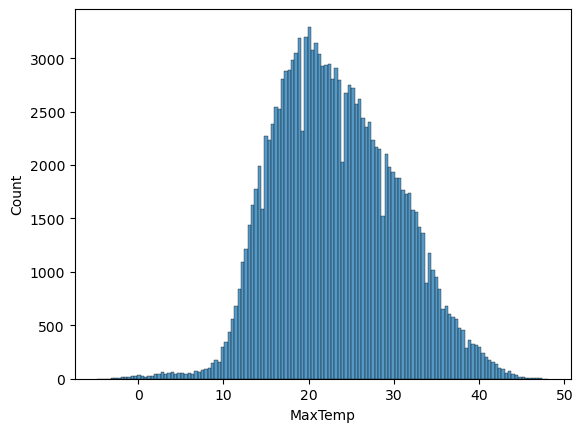

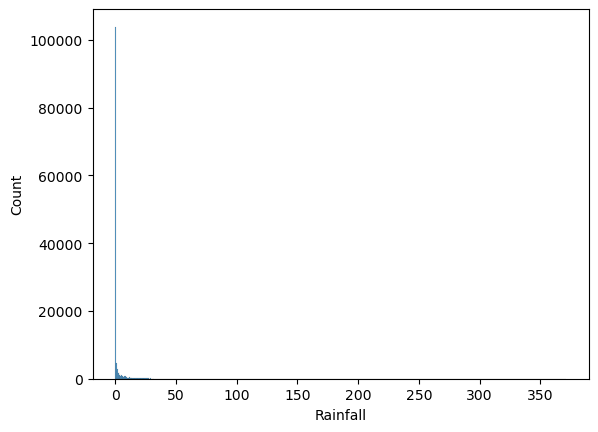

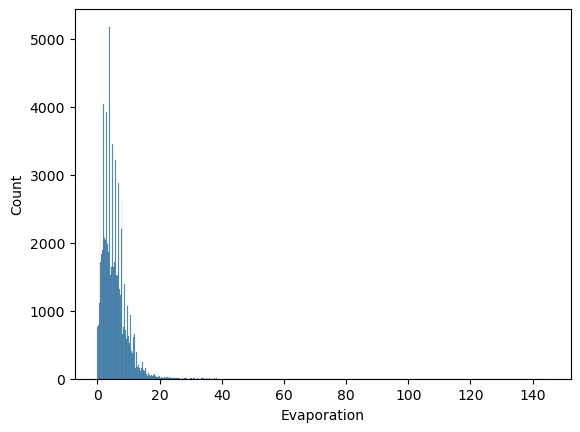

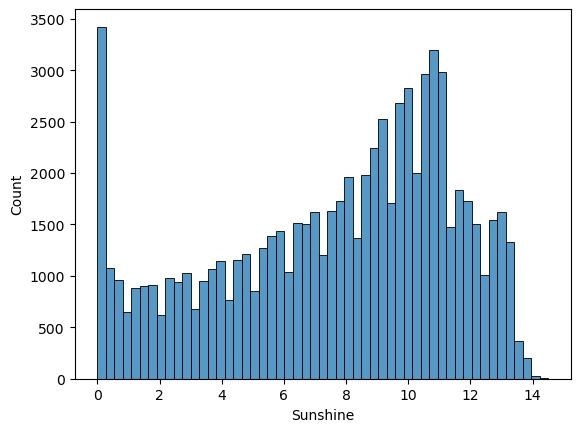

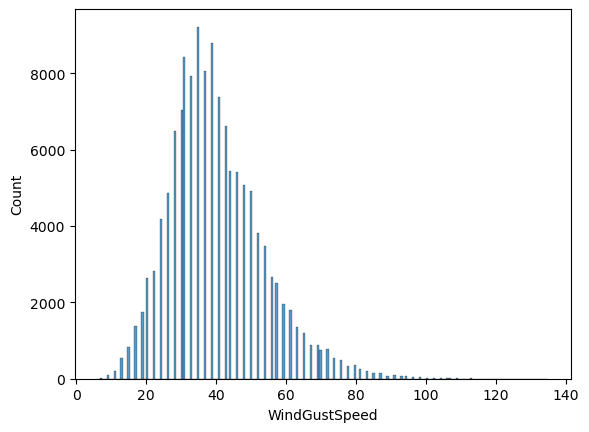

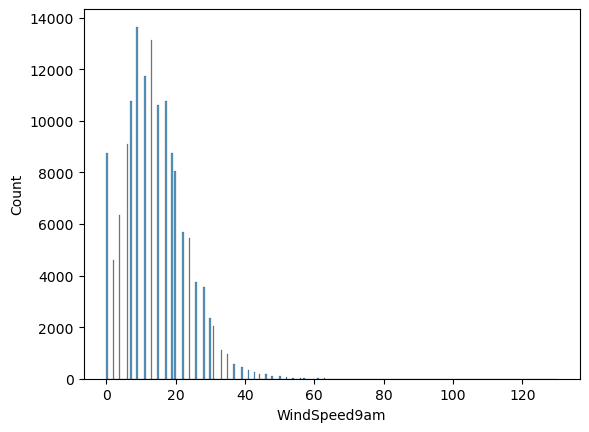

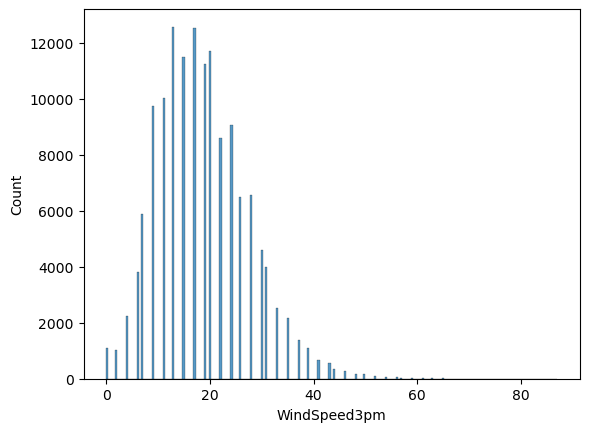

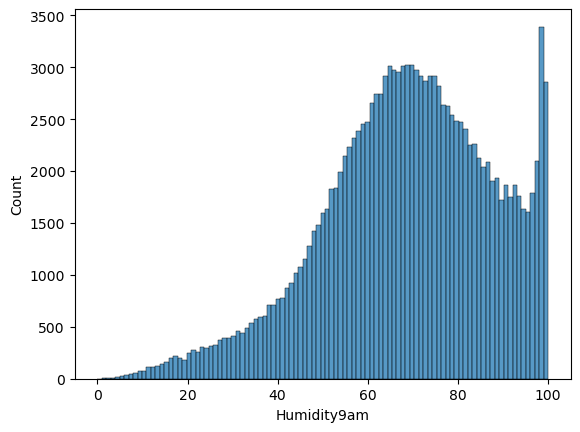

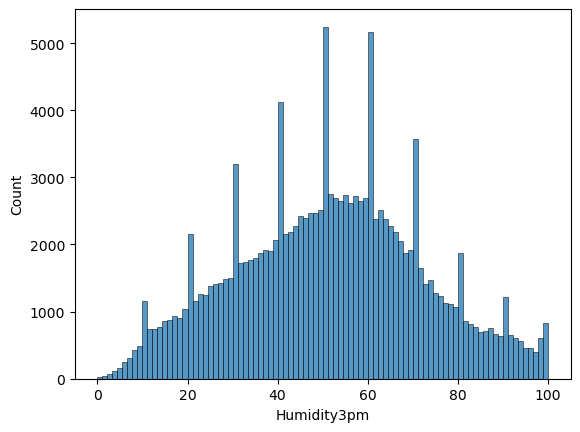

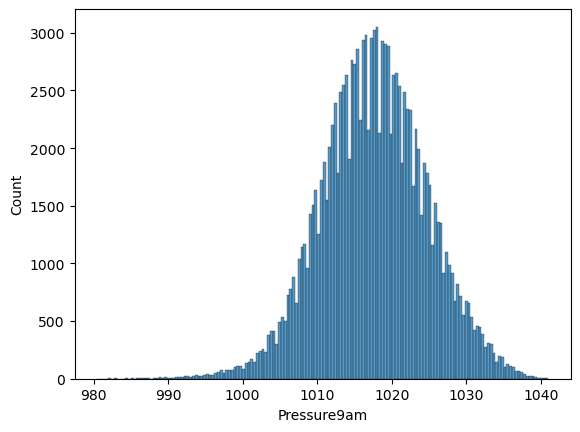

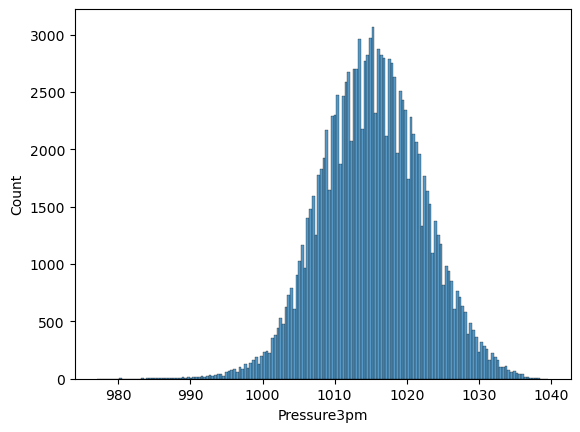

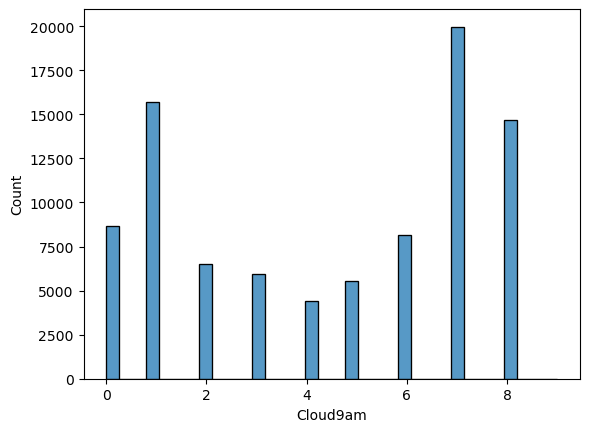

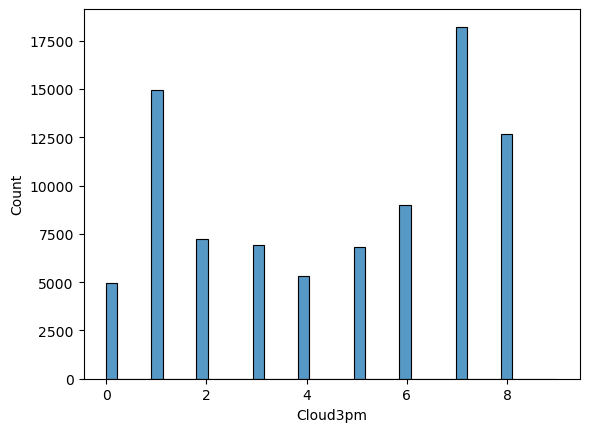

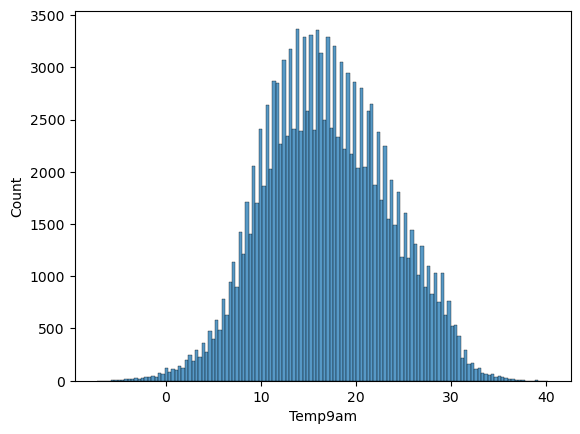

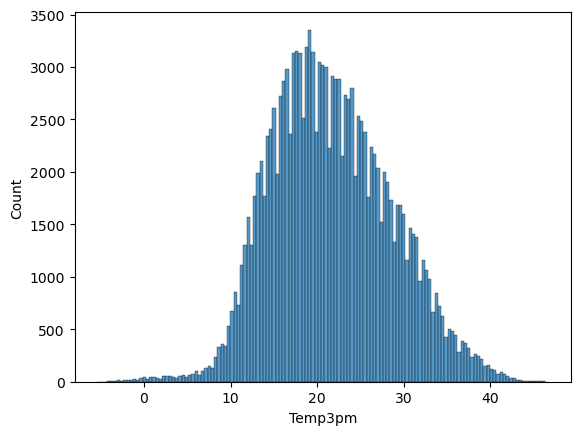

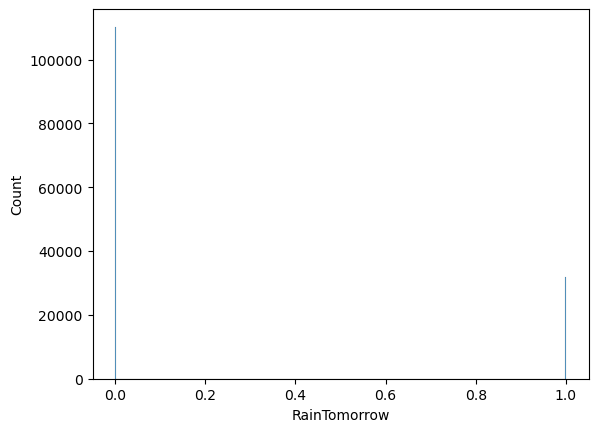

In [14]:
for i in df.select_dtypes(include='number').columns:
  sns.histplot(data=df, x=i)
  plt.show()

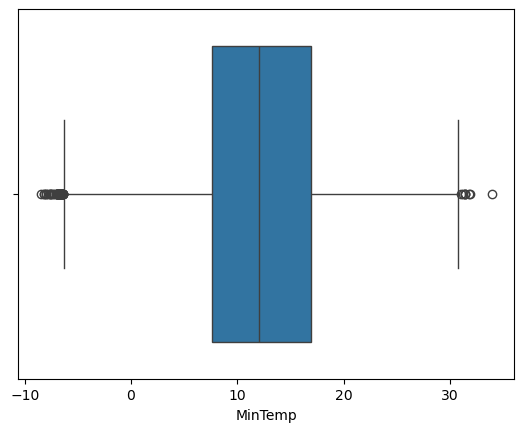

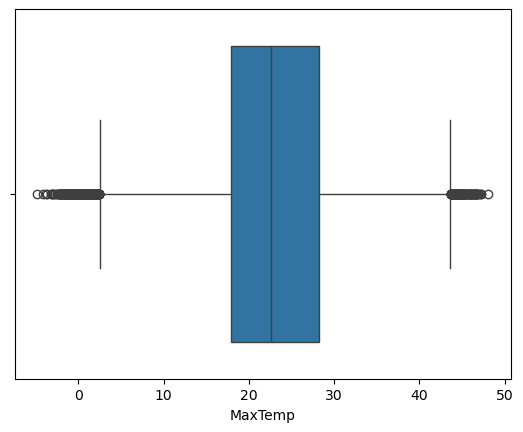

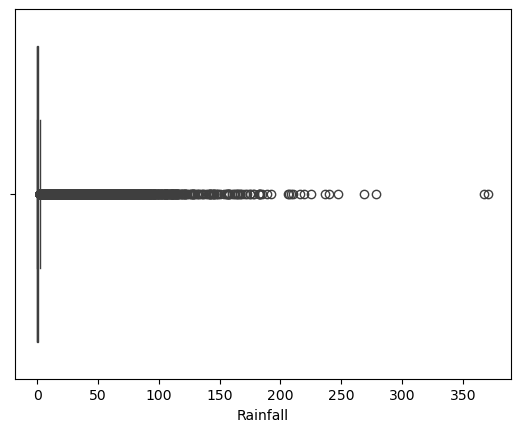

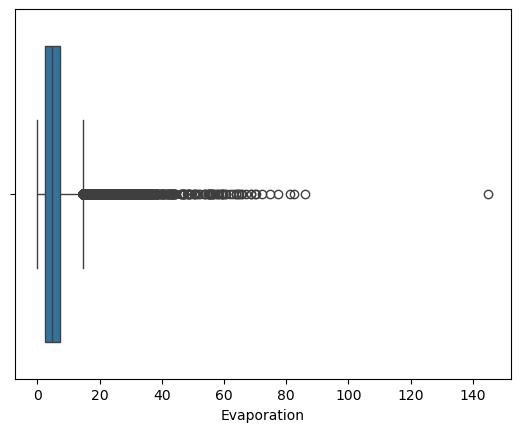

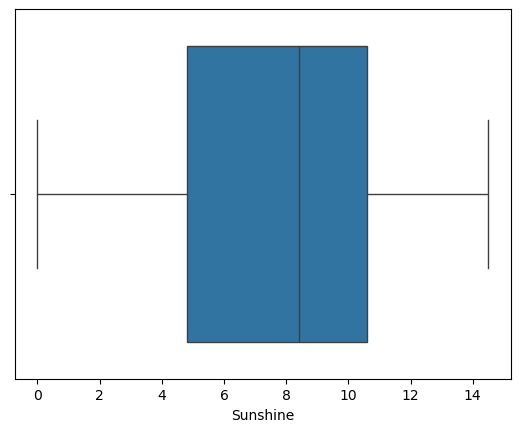

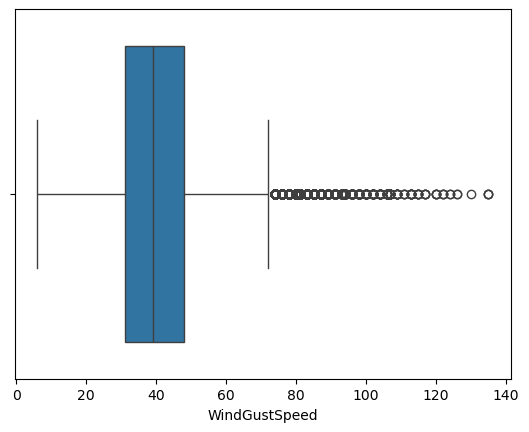

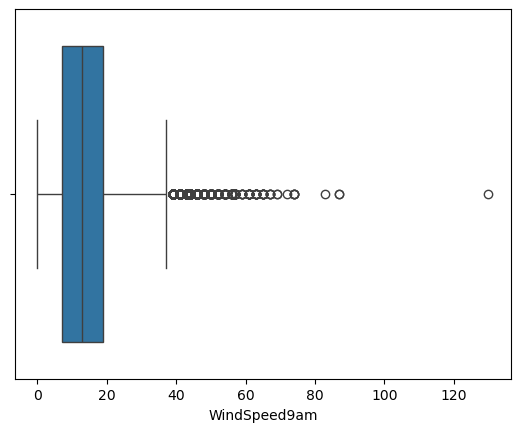

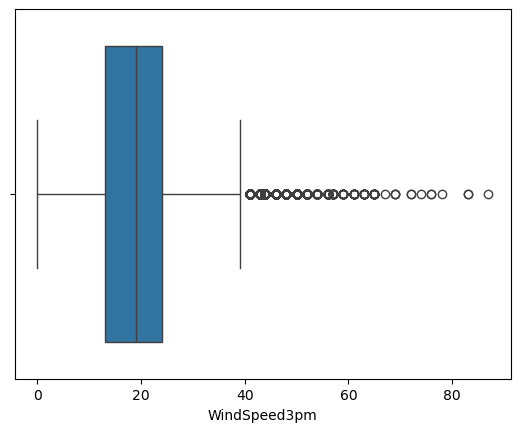

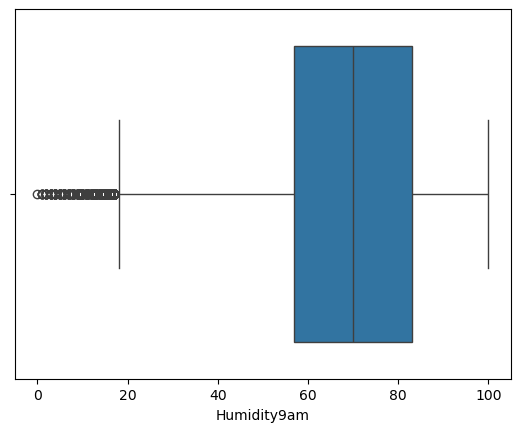

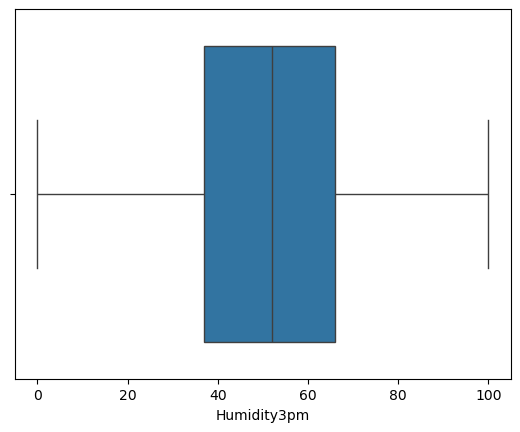

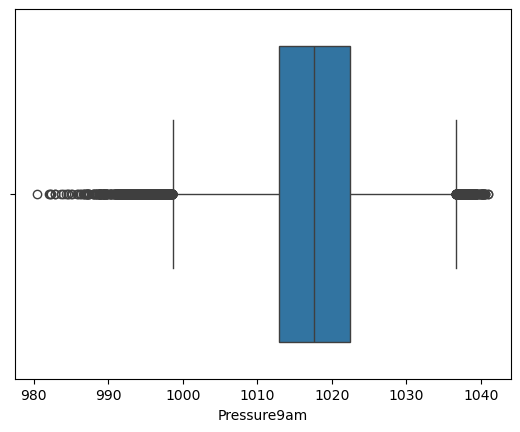

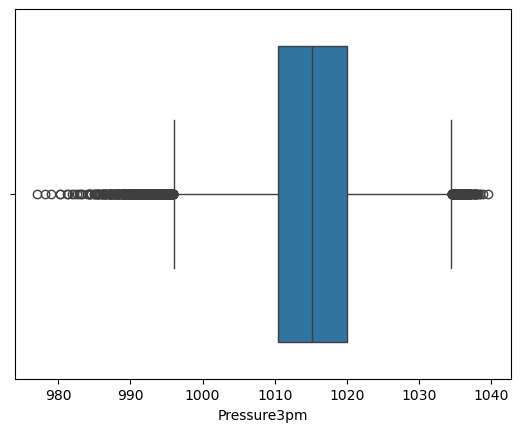

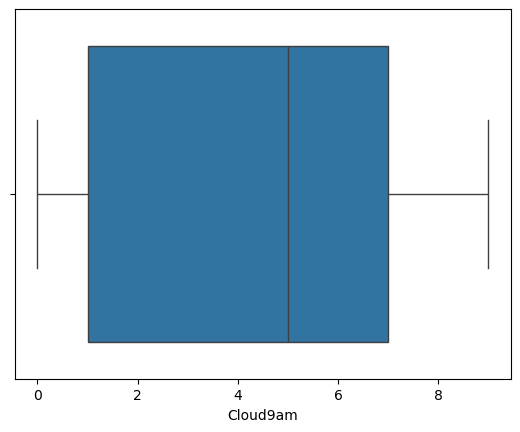

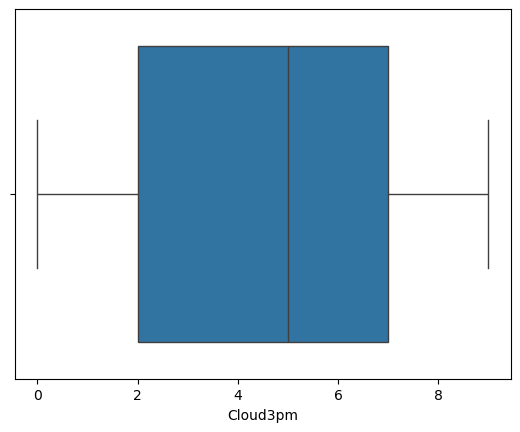

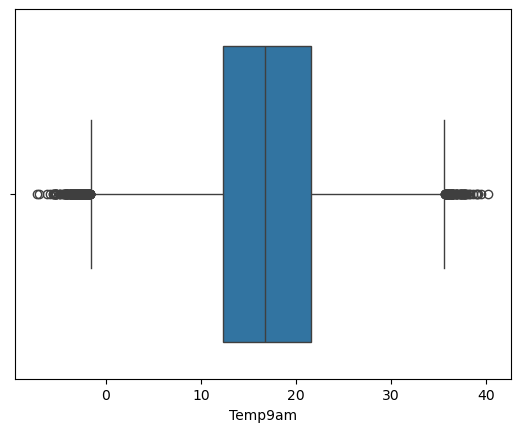

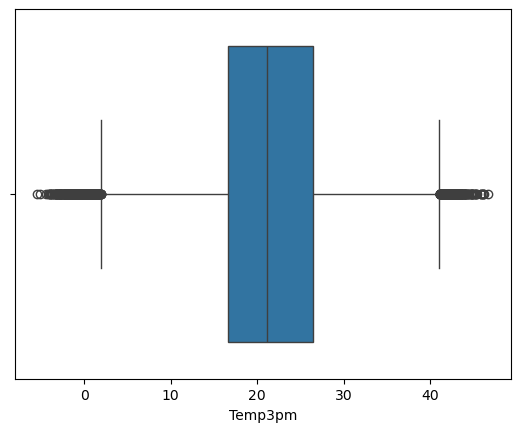

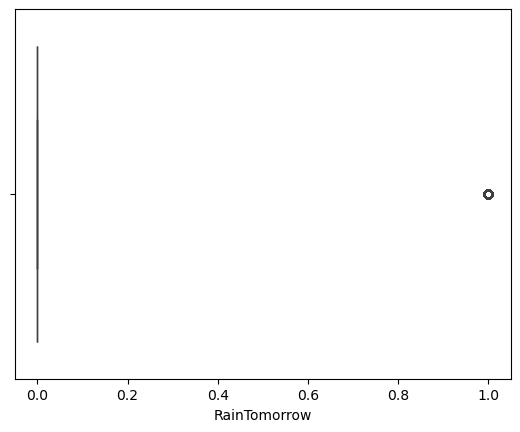

In [15]:
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(data=df, x=i)
  plt.show()

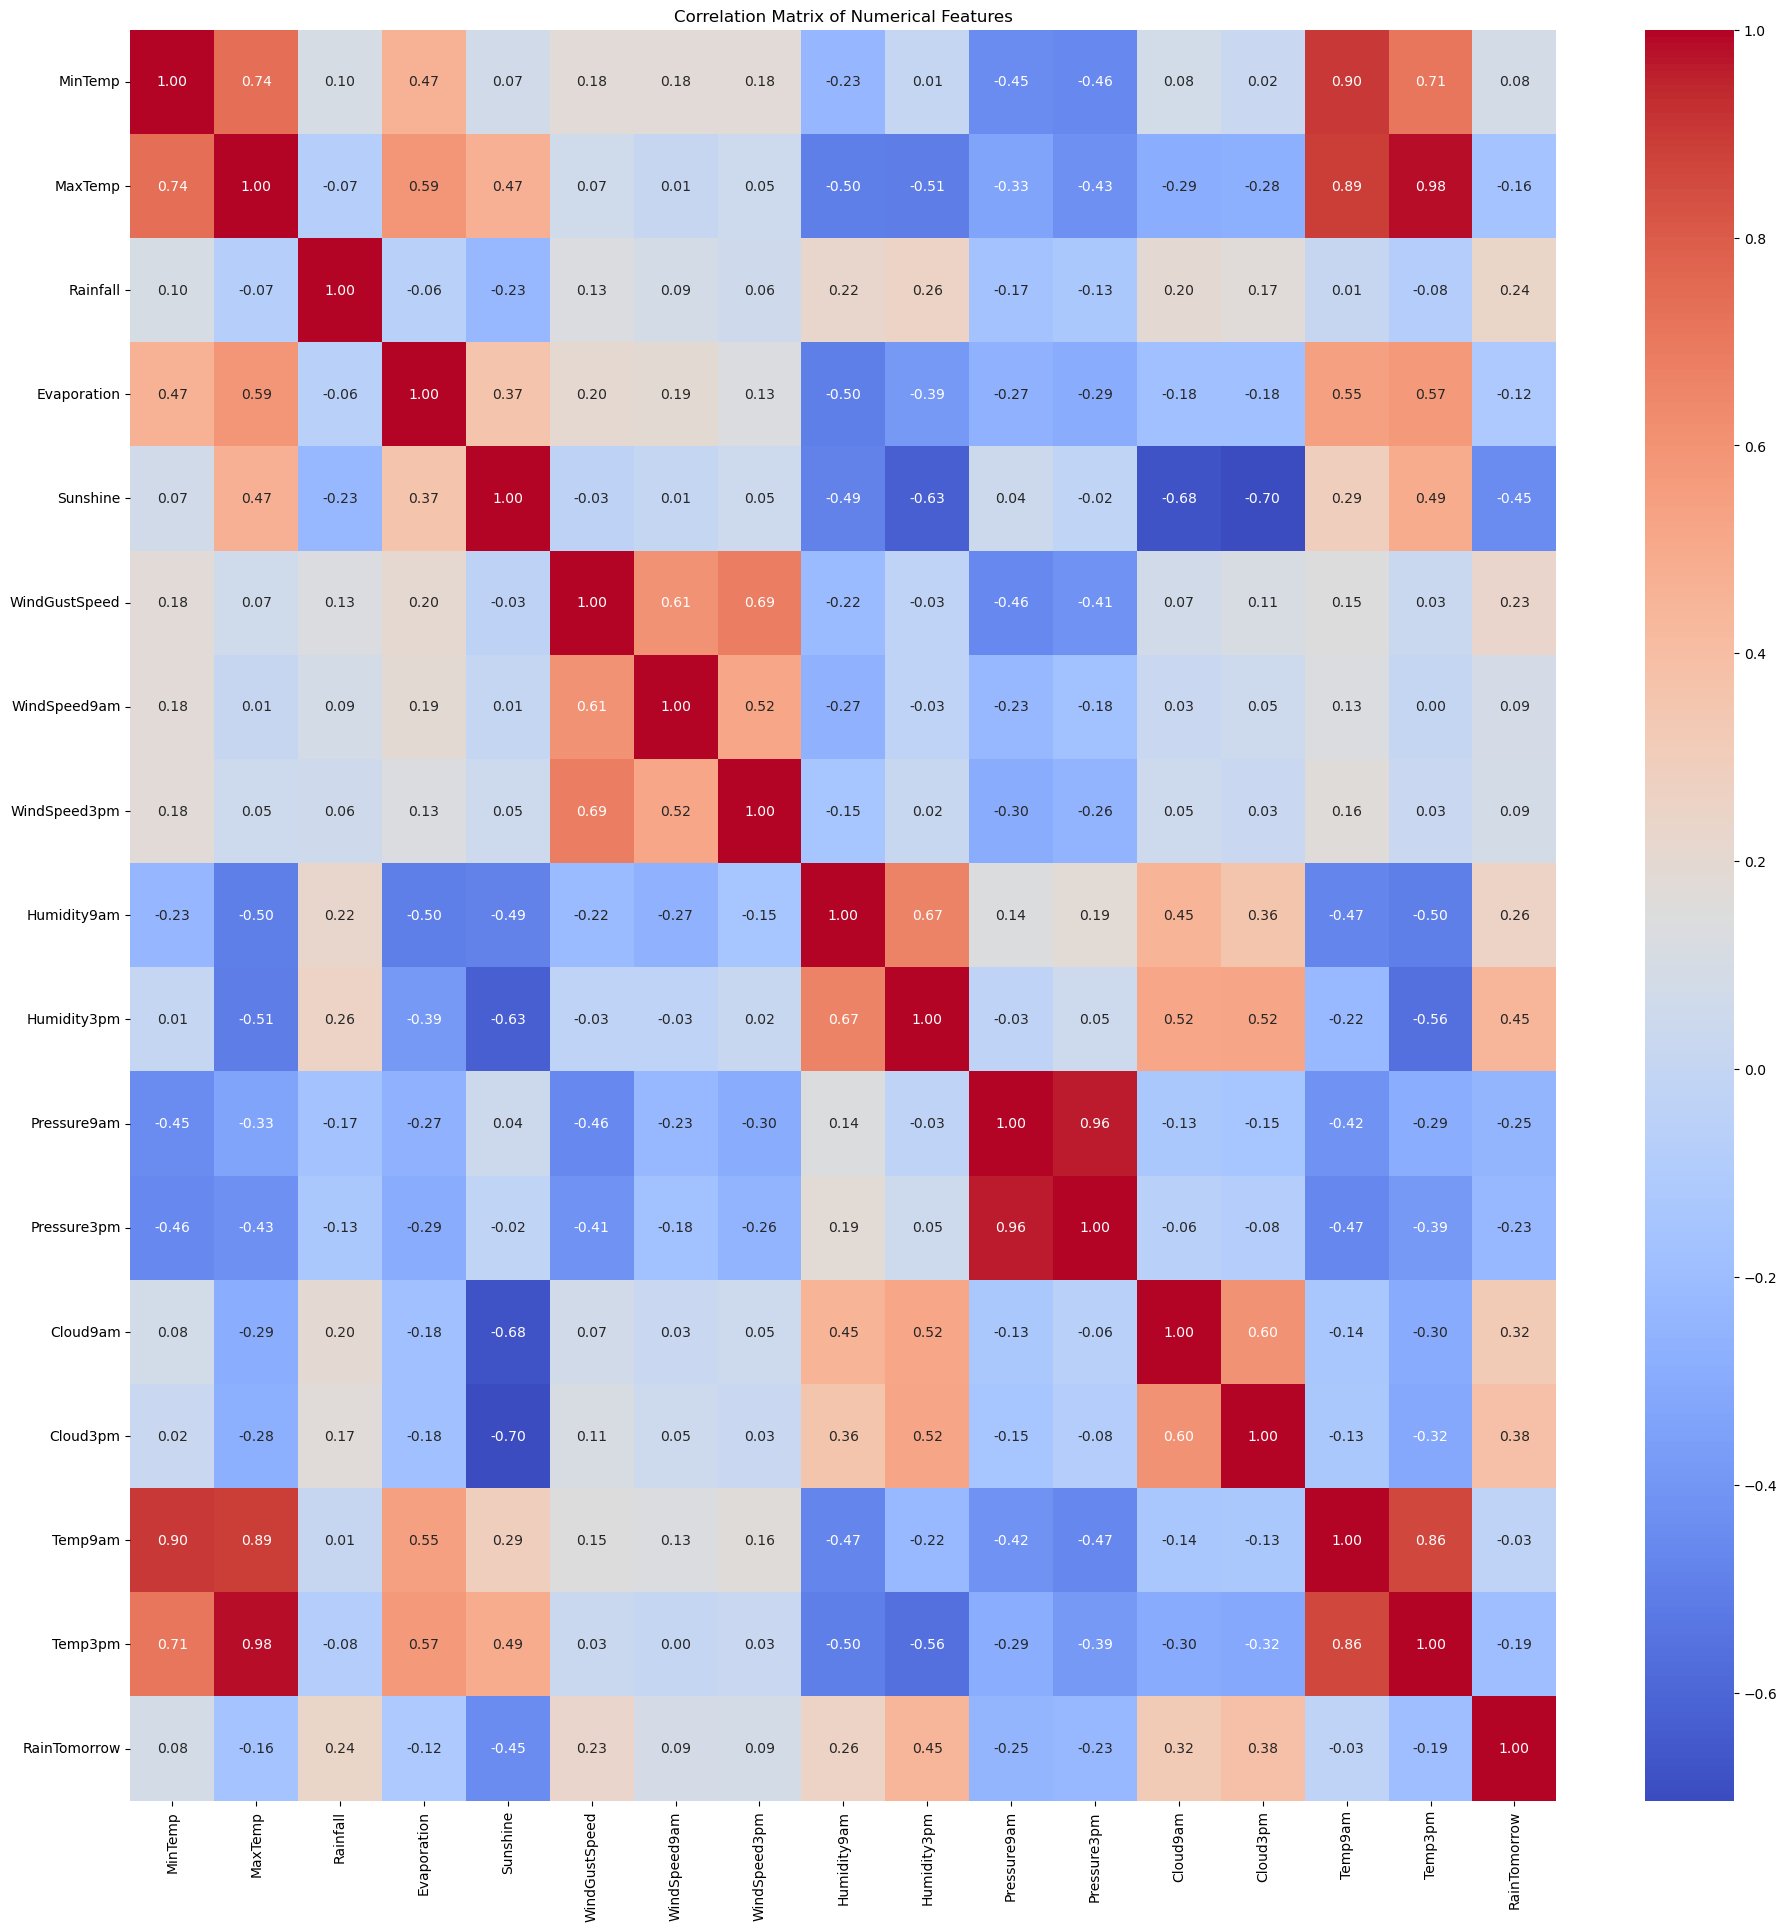

In [16]:
plt.figure(figsize=(23, 23))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

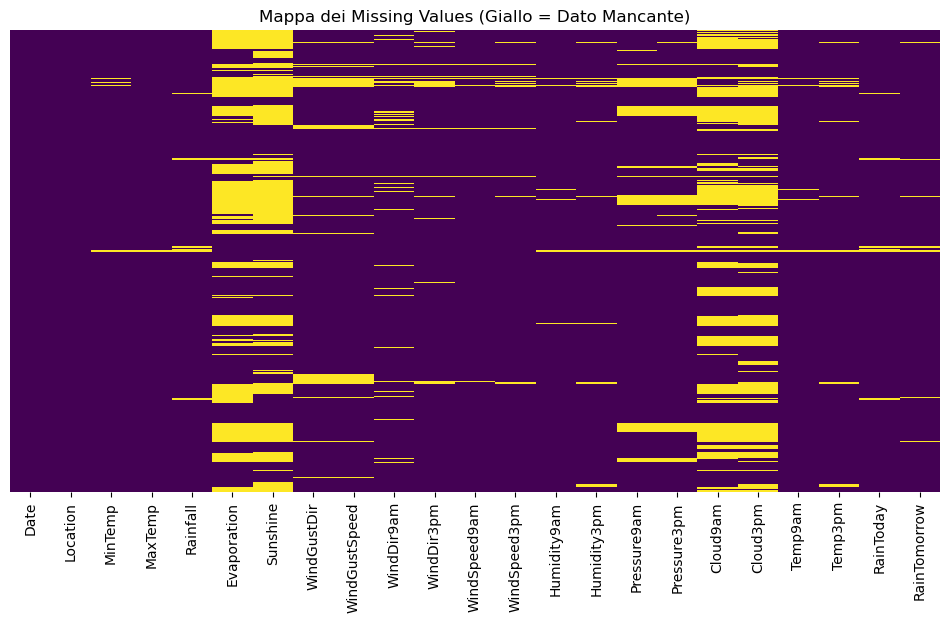

In [17]:
# heatmap per capire se i dati mancano casualmente o a blocchi a causa di sensori rotti ad esempio
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Mappa dei Missing Values (Giallo = Dato Mancante)")
plt.show()

In [18]:
# Calcolo percentuale esatta per decidere se buttare la colonna
missing_percentage = df.isnull().mean() * 100
print("Feature con più del 70% di dati mancanti:")
print(missing_percentage[missing_percentage > 70])

Feature con più del 70% di dati mancanti:
Series([], dtype: float64)


In [19]:
# Converto la data in formato datetime per estrarre il mese
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

C:\Users\744252\AppData\Local\Temp\ipykernel_20936\1998609149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='RainTomorrow', data=df, errorbar=None, palette='Blues')


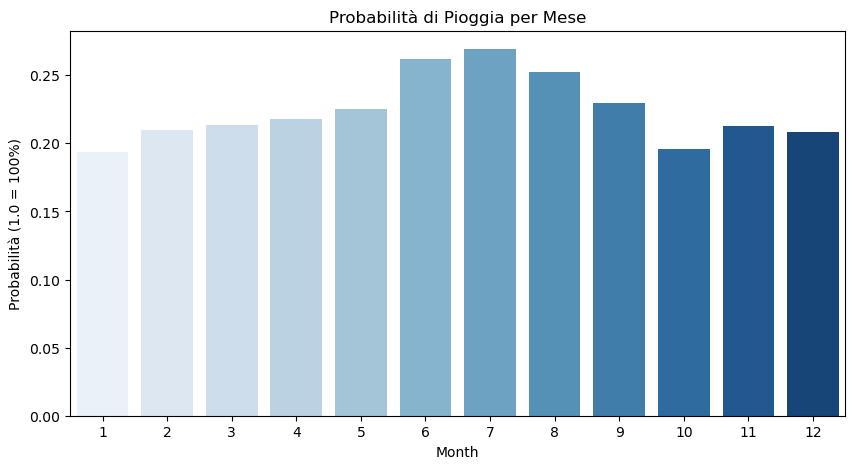

In [20]:
# vedo se piove di più in certi mesi
plt.figure(figsize=(10, 5))
sns.barplot(x='Month', y='RainTomorrow', data=df, errorbar=None, palette='Blues')
plt.title("Probabilità di Pioggia per Mese")
plt.ylabel("Probabilità (1.0 = 100%)")
plt.show()

In [21]:
df.isnull().sum()/df.shape[0]*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
Month             0.000000
dtype: float64

In [22]:
max_missing = df.isnull().sum(axis=1).max()
rows_with_max_missing = df[df.isnull().sum(axis=1) == max_missing]
rows_with_max_missing

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
984,2011-09-11,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
985,2011-09-12,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2032,2014-09-22,Albury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
3525,2010-05-01,BadgerysCreek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3526,2010-05-02,BadgerysCreek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127747,2011-08-07,Walpole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
127748,2011-08-08,Walpole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
127749,2011-08-09,Walpole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
136063,2017-06-18,Launceston,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


In [23]:
df.isnull().sum(axis=1).max()/df.shape[0]*100

0.014436958614051974

In [24]:
rows_to_drop_indices = rows_with_max_missing.index
df.drop(rows_to_drop_indices, inplace=True)

In [25]:
# Non posso addestrare il modello se non conosco la predizione
df.dropna(subset=['RainTomorrow'], inplace=True)

In [26]:
print(f"Dataset dopo rimozione target nulli: {df.shape}")

Dataset dopo rimozione target nulli: (142193, 24)


In [27]:
#estraggo le informazioni utili dalla data
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [28]:
print("Range temporale del dataset:")
print(f"Inizio: {df['Date'].min()} - Fine: {df['Date'].max()}")

Range temporale del dataset:
Inizio: 2007-11-01 00:00:00 - Fine: 2017-06-25 00:00:00


In [29]:
# per lo split uso il 2016 come confine (circa 80% train, 20% test).

train_data = df[df['Year'] < 2016].copy()
test_data = df[df['Year'] >= 2016].copy()

In [30]:
print(f"\nDimensioni Train Set (< 2016): {train_data.shape} ({len(train_data)/len(df):.1%})")
print(f"Dimensioni Test Set (>= 2016): {test_data.shape} ({len(test_data)/len(df):.1%})")


Dimensioni Train Set (< 2016): (116219, 26) (81.7%)
Dimensioni Test Set (>= 2016): (25974, 26) (18.3%)


In [31]:
# Separazione X e y
target = 'RainTomorrow'
X_train = train_data.drop(columns=[target, 'Date']) # Rimuovo Target e Data originale
y_train = train_data[target]

X_test = test_data.drop(columns=[target, 'Date'])
y_test = test_data[target]

In [32]:
# Dall'analisi della Heatmap sono emerse coppie con correlazione > 0.9.
# rimuovo le variabili "duplicate" mantenendo quelle riassuntive.

features_to_drop = ['Temp9am', 'Temp3pm', 'Pressure9am'] # Tengo Pressure3pm che è più vicina a "domani"

# rimuovo sia dal Train che dal Test
X_train.drop(columns=features_to_drop, inplace=True, errors='ignore')
X_test.drop(columns=features_to_drop, inplace=True, errors='ignore')

Imputazione valori NaN e gestione delle variabili categoriche

In [33]:
# 1. Identifico le colonne numeriche e categoriche
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
print(f"Feature Numeriche: {(numeric_cols)}")
print(f"Feature Categoriche: {(categorical_cols)}")

Feature Numeriche: Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Month', 'Year',
       'Day'],
      dtype='object')
Feature Categoriche: Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')


In [34]:
for col in numeric_cols:
  #calcolo la mappa delle mediane per ogni città sul Train Set
  median_map = X_train.groupby('Location')[col].median()

  #nel caso in cui ci fossero città vuote calcolo anche la mediana globale del Train
  global_median = X_train[col].median()

  #riempio il Train mappando i valori mancanti con la colonna Location
  X_train[col] = X_train[col].fillna(X_train['Location'].map(median_map))
  #uso il "paracadute" creato con la mediana globale
  X_train[col] = X_train[col].fillna(global_median)

  #e ora riempio anche ul test con la mappa imparata dal Train
  X_test[col] = X_test[col].fillna(X_test['Location'].map(median_map))
  X_test[col] = X_test[col].fillna(global_median)

In [35]:
for col in categorical_cols:
  if col == 'Location' : continue #non imputo la location stessa

  #imputo i valori NaN per la Feature città con la moda, se c'è più di una moda prendo la prima
  mode_map = X_train.groupby('Location')[col].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

  #creu un paracadute come fatto per le feature numeriche
  global_mode = X_train[col].mode()[0]

  #riempio train e test con la stessa mappa
  X_train[col] = X_train[col].fillna(X_train['Location'].map(mode_map))
  X_train[col] = X_train[col].fillna(global_mode)

  X_test[col] = X_test[col].fillna(X_test['Location'].map(mode_map))
  X_test[col] = X_test[col].fillna(global_mode)

In [36]:
# Converto la variabile Target 'RainToday' in 0 e 1 (No=0, Yes=1)
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})


In [37]:
#trasformo le altre colonne categoriche in colonne numeriche evitando ridondanza di informazione
X_train_enc = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True, dtype=int)
X_test_enc = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True, dtype=int)

In [38]:
#allineo le colonne per evitare possibili crash
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='left', axis=1, fill_value=0)

GESTIONE OUTLINER

In [39]:
#capping tra 1% e 99%
#escludo le feature binarie (comprese quelle create con l'encoding)
cols_to_cap = [c for c in numeric_cols if c in X_train_enc.columns]

for col in cols_to_cap:
  lower = X_train_enc[col].quantile(0.01)
  upper = X_train_enc[col].quantile(0.99)

  X_train_enc[col] = X_train_enc[col].clip(lower=lower, upper=upper)
  X_test_enc[col] = X_test_enc[col].clip(lower=lower, upper=upper)

In [40]:
#trasformazione logaritmica per la feature "Rainfall" dato che è molto asimmetrica
X_train_enc['Rainfall_Log'] = np.log1p(X_train_enc['Rainfall'])
X_test_enc['Rainfall_Log'] = np.log1p(X_test_enc['Rainfall'])

# Rimuoviamo la colonna originale
X_train_enc.drop(columns=['Rainfall'], inplace=True)
X_test_enc.drop(columns=['Rainfall'], inplace=True)

SCALING

In [41]:
scaler = StandardScaler()

In [42]:
cols_final = X_train_enc.columns

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_enc), columns=cols_final, index = X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_enc), columns=cols_final, index = X_test.index)

#allineo anche y sugli indici per sicurezza
y_train = y_train.loc[X_train_scaled.index]
y_test = y_test.loc[X_test_scaled.index]

In [43]:
print(f"Dimensioni Finali Train: {X_train_scaled.shape}")
print(f"Dimensioni Finali Test: {X_test_scaled.shape}")

Dimensioni Finali Train: (116219, 110)
Dimensioni Finali Test: (25974, 110)


In [44]:
X_train_scaled.head()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,Rainfall_Log
0,0.216151,-0.028966,-0.142972,0.167865,0.311979,0.694947,0.622814,0.119353,-1.427336,-1.264172,...,-0.27147,-0.302361,-0.264294,-0.24494,-0.263828,-0.277506,3.935986,-0.267835,-0.531376,-0.004486
1,-0.734952,0.289159,-0.142972,0.167865,0.311979,-1.147456,0.390454,-1.307479,-1.281802,-1.157168,...,-0.27147,-0.302361,-0.264294,-0.24494,-0.263828,-0.277506,-0.254066,3.733644,-0.531376,-0.537969
2,0.136892,0.375920,-0.142972,0.167865,0.468383,0.579796,0.855175,-1.624552,-1.039246,-1.019592,...,-0.27147,-0.302361,-0.264294,-0.24494,-0.263828,-0.277506,-0.254066,3.733644,-0.531376,-0.537969
3,-0.449621,0.708506,-0.142972,0.167865,-1.252062,-0.341405,-1.119890,-1.254633,-1.718404,-0.392855,...,-0.27147,-0.302361,-0.264294,-0.24494,-0.263828,-0.277506,-0.254066,-0.267835,-0.531376,-0.537969
4,0.866071,1.330295,-0.142972,0.167865,0.077373,-0.802006,0.158093,0.700655,-0.893712,-1.432321,...,-0.27147,-0.302361,-0.264294,-0.24494,-0.263828,-0.277506,-0.254066,-0.267835,-0.531376,0.248795


ADDESTRAMENTO E OFFLINE VALUATION

In [45]:
#funzione per la valutazione
def valuta_modello(model, X_test, y_test, nome_modello):
    print(f"\n--- Valutazione: {nome_modello} ---")

    y_pred = model.predict(X_test)

    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1] #probabilità classe 1
    else:
        y_prob = y_pred #fallback

    print(classification_report(y_test, y_pred)) #stampa il report completo

    #matrice di confusione
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Rain', 'Rain'])

    fig, ax = plt.subplots(figsize=(4, 4))
    disp.plot(cmap='Blues', ax=ax, colorbar=False)
    plt.title(nome_modello)
    plt.show()
    return y_prob, y_pred

In [46]:
#dizionari per salvare i riusltati
probs = {}
preds = {}


--- Valutazione: Naive Bayes ---
              precision    recall  f1-score   support

         0.0       0.87      0.60      0.71     20028
         1.0       0.34      0.70      0.46      5946

    accuracy                           0.62     25974
   macro avg       0.61      0.65      0.58     25974
weighted avg       0.75      0.62      0.65     25974



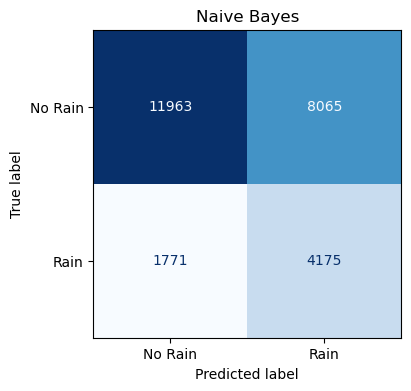

In [47]:
#Gaussian Naive Bayes usato come Baseline
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
probs['Naive Bayes'], preds['Naive Bayes'] = valuta_modello(gnb, X_test_scaled, y_test, "Naive Bayes")


--- Valutazione: Decision Tree ---
              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82     20028
         1.0       0.47      0.77      0.58      5946

    accuracy                           0.75     25974
   macro avg       0.69      0.76      0.70     25974
weighted avg       0.81      0.75      0.77     25974



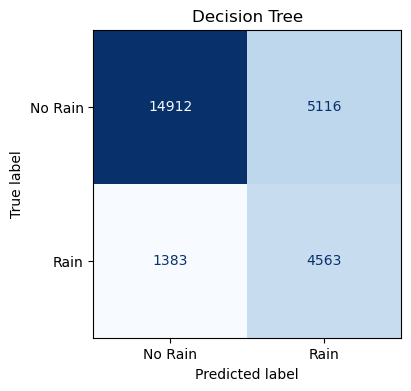

In [48]:
#Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=10, class_weight='balanced')
dt.fit(X_train_scaled, y_train)
probs['Decision Tree'], preds['Decision Tree'] = valuta_modello(dt, X_test_scaled, y_test, "Decision Tree")


--- Valutazione: Random Forest ---
              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85     20028
         1.0       0.52      0.73      0.61      5946

    accuracy                           0.78     25974
   macro avg       0.71      0.76      0.73     25974
weighted avg       0.82      0.78      0.79     25974



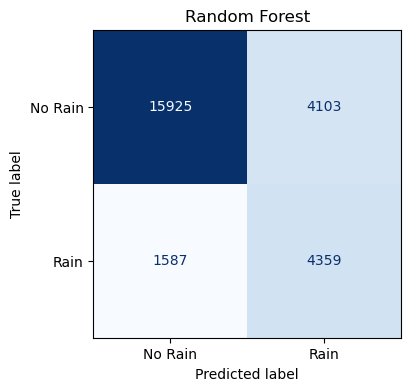

In [49]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, class_weight='balanced')
rf.fit(X_train_scaled, y_train)
probs['Random Forest'], preds['Random Forest'] = valuta_modello(rf, X_test_scaled, y_test, "Random Forest")

ROC CURVE

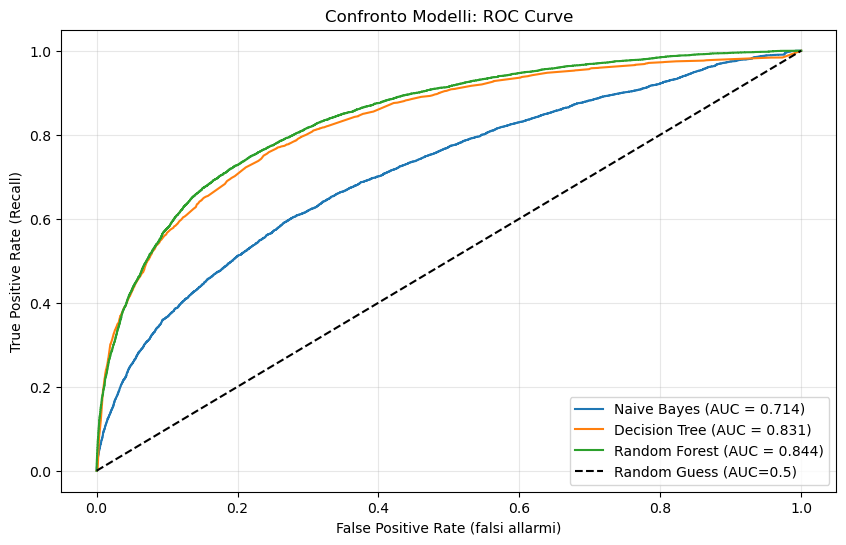

In [50]:
plt.figure(figsize=(10, 6))

for nome, y_prob in probs.items():
  #calcolo la roc curve
  fpr, tpr, _ = roc_curve(y_test, y_prob)
  auc = roc_auc_score(y_test, y_prob)

  plt.plot(fpr, tpr, label=f"{nome} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC=0.5)')
plt.xlabel('False Positive Rate (falsi allarmi)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Confronto Modelli: ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [51]:
#Soft AutoML
#configuro gli iperparametri per ognuno dei tre modelli

#Naive Bayes
search_space_gnb = {
    'var_smoothing': Real(1e-10, 1e-5, prior='log-uniform')
}

#Decision Tree
search_space_dt = {
    'max_depth': Integer(3, 25), #profondità albero
    'min_samples_split': Integer(2, 50), #minimo campioni per dividere un nodo
    'min_samples_leaf': Integer(1, 20), #minimo campioni in una foglia
    'criterion': Categorical(['gini', 'entropy'])
}



#Random Forest
search_space_rf = {
    'n_estimators': Integer(50, 500), #numero di alberi #numero di alberi
    'max_depth': Integer(5, 25), #profondità albero
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'bootstrap': Categorical([True, False])
}



In [52]:
def ottimizza_e_valuta(model_base, search_space, X_train, y_train, X_test, y_test, nome_modello):
  print(f"\n--- Ottimizzazione Bayesiana: {nome_modello} ---")

  # BayesSearchCV: Cerca i parametri migliori usando l'approccio Bayesiano
  # n_iter=30: Proverà 30 combinazioni intelligenti
  # cv=3: Cross Validation a 3 fold
  opt = BayesSearchCV(
      model_base,
      search_space,
      n_iter=30,
      cv=3,
      n_jobs=1,
      random_state=42,
      scoring='roc_auc' # ottimizzo per AUC
  )

  #ricerca
  opt.fit(X_train, y_train)
  print(f"Migliori parametri trovati: {opt.best_params_}")
  print(f"Miglior AUC in CV: {opt.best_score_:.4f}")

  #valutazione sul Test Set col modello migliore trovato
  best_model = opt.best_estimator_
  y_pred = best_model.predict(X_test)
  if hasattr(best_model, 'predict_proba'):
    y_prob = best_model.predict_proba(X_test)[:, 1] #probabilità classe 1
  else:
    y_prob = y_pred #fallback

  print(classification_report(y_test, y_pred)) #stampa il report completo

  cm = confusion_matrix(y_test, y_pred)
  ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Rain', 'Rain']).plot(cmap='Blues', colorbar=False)
  plt.title(f"{nome_modello} (Optimized)")
  plt.show()

  return y_prob, best_model

inizio ottimizzazione

--- Ottimizzazione Bayesiana: Naive Bayes ---
Migliori parametri trovati: OrderedDict({'var_smoothing': 1.1233621690895233e-08})
Miglior AUC in CV: 0.7321
              precision    recall  f1-score   support

         0.0       0.87      0.60      0.71     20028
         1.0       0.34      0.70      0.46      5946

    accuracy                           0.62     25974
   macro avg       0.61      0.65      0.58     25974
weighted avg       0.75      0.62      0.65     25974



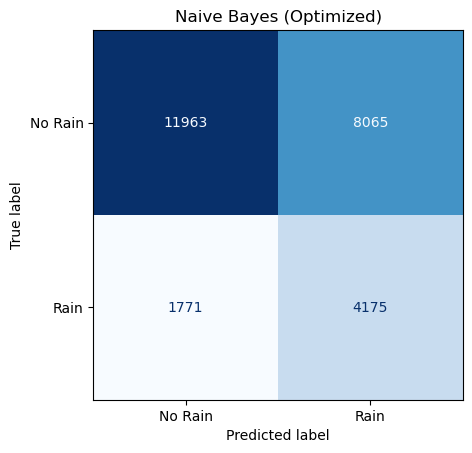


--- Ottimizzazione Bayesiana: Decision Tree ---
Migliori parametri trovati: OrderedDict({'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 29})
Miglior AUC in CV: 0.8328
              precision    recall  f1-score   support

         0.0       0.91      0.76      0.83     20028
         1.0       0.48      0.75      0.59      5946

    accuracy                           0.76     25974
   macro avg       0.70      0.76      0.71     25974
weighted avg       0.81      0.76      0.77     25974



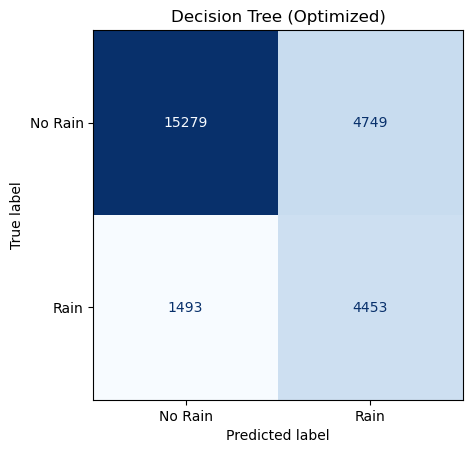


--- Ottimizzazione Bayesiana: Random Forest ---
Migliori parametri trovati: OrderedDict({'bootstrap': True, 'max_depth': 25, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 500})
Miglior AUC in CV: 0.8569
              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87     20028
         1.0       0.57      0.72      0.63      5946

    accuracy                           0.81     25974
   macro avg       0.74      0.78      0.75     25974
weighted avg       0.83      0.81      0.82     25974



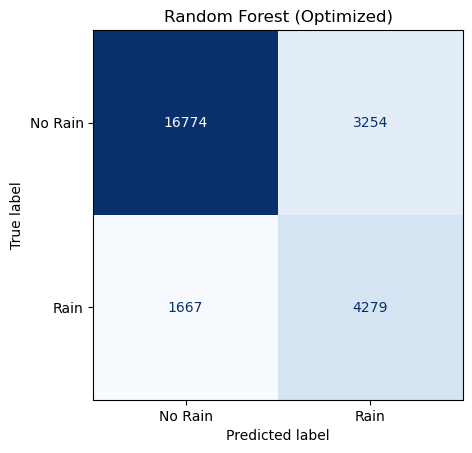

In [53]:
print("inizio ottimizzazione")

probs = {}
models = {}

#Naive Bayes
gnb = GaussianNB()
probs['Naive Bayes'], models['Naive Bayes'] = ottimizza_e_valuta(
    gnb, search_space_gnb, X_train_scaled, y_train, X_test_scaled, y_test, "Naive Bayes"
)

#Decision Tree
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
probs['Decision Tree'], models['Decision Tree'] = ottimizza_e_valuta(
    dt, search_space_dt, X_train_scaled, y_train, X_test_scaled, y_test, "Decision Tree"
)

#Random Forest
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
probs['Random Forest'], models['Random Forest'] = ottimizza_e_valuta(
    rf, search_space_rf, X_train_scaled, y_train, X_test_scaled, y_test, "Random Forest"
)

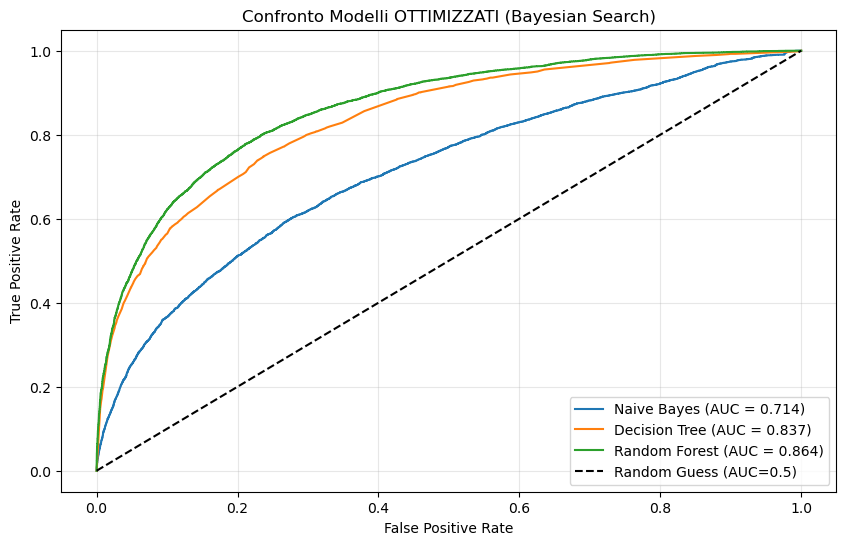

In [54]:
#ROC Curve post-ottimizzazione

plt.figure(figsize=(10, 6))
for nome, y_prob in probs.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{nome} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC=0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Confronto Modelli OTTIMIZZATI (Bayesian Search)")
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [55]:
rf_debug = RandomForestClassifier(n_estimators=100, random_state=42)
rf_debug.fit(X_train_scaled, y_train)

# Calcoliamo l'importanza
importances = rf_debug.feature_importances_
feature_names = X_train_scaled.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordiniamo
print(feature_imp_df.sort_values(by='Importance', ascending=False).head(5))

          Feature  Importance
8     Humidity3pm    0.148617
9     Pressure3pm    0.062688
3        Sunshine    0.061249
7     Humidity9am    0.056116
109  Rainfall_Log    0.055008


--- SOGLIA OTTIMALE (Youden's J) ---
La miglior soglia matematica è: 0.4444
A questa soglia hai:
Recall (TPR): 0.7780
False Positive Rate: 0.2117


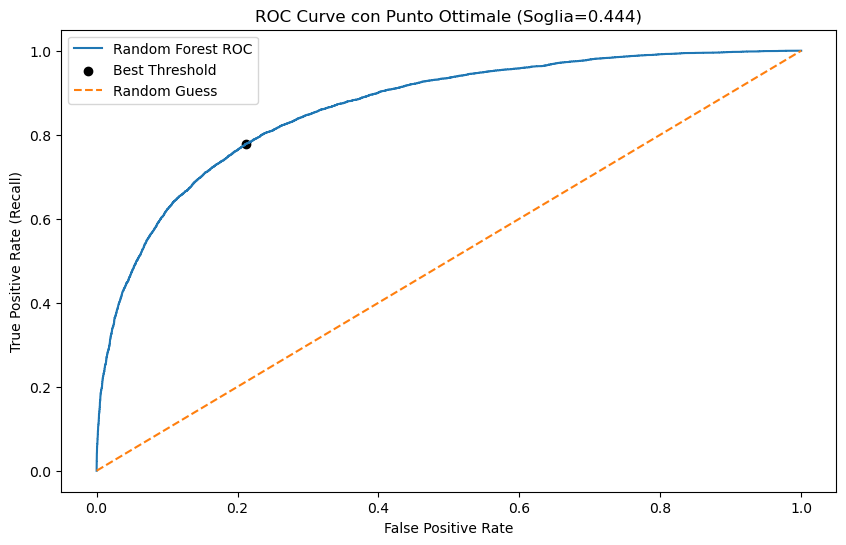


Report con la soglia ottimale (0.4444):
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85     20028
         1.0       0.52      0.78      0.62      5946

    accuracy                           0.79     25974
   macro avg       0.72      0.78      0.74     25974
weighted avg       0.83      0.79      0.80     25974



In [56]:
# 1. Recupero le probabilità dal Random Forest
if 'models' in locals() and 'Random Forest' in models:
    best_model = models['Random Forest']
else:
    best_model = rf # Fallback

# Probabilità di pioggia (Classe 1)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Calcolo la Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# 3. Calcolo l'indice  Youden's J per ogni soglia
# J = Sensitivity (Recall) + Specificity - 1
# Che equivale a: J = TPR - FPR
J = tpr - fpr
ix = np.argmax(J) # Indice del valore massimo

best_thresh = thresholds[ix]
print(f"--- SOGLIA OTTIMALE (Youden's J) ---")
print(f"La miglior soglia matematica è: {best_thresh:.4f}")
print(f"A questa soglia hai:")
print(f"Recall (TPR): {tpr[ix]:.4f}")
print(f"False Positive Rate: {fpr[ix]:.4f}")

# 4. Disegniamo il grafico con il punto evidenziato
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Random Forest ROC')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title(f'ROC Curve con Punto Ottimale (Soglia={best_thresh:.3f})')
plt.legend()
plt.show()

# 5. Vediamo il Report con questa nuova soglia
print(f"\nReport con la soglia ottimale ({best_thresh:.4f}):")
y_pred_opt = (y_prob >= best_thresh).astype(int)
print(classification_report(y_test, y_pred_opt))

In [57]:
# Salvo modello e scaler
joblib.dump(models['Random Forest'], 'modello_meteo_rf.pkl') 
joblib.dump(scaler, 'scaler_meteo.pkl')

['scaler_meteo.pkl']